<a class="anchor" id="contents"></a>
# Содержание

[Описание проекта](#about)
1. [Откроем файлы с данными и объединим их в один датафрейм](#open)


2. [Предобработка данных](#preprocessing)    
    2.1. [Проверим типы данных](#check_type)    
    2.2. [Изучим пропуски в датафрейме](#study_skip)    
    2.3. [Изучим дубликаты в датафрейме](#study_duplicates)    
    2.4. [Изучим категориальные значения](#study_category)    
    2.5 [Проверим количественные значения](#cheсk_values)    
    2.6. [Добавим новые столбцы](#add_columns)    
    [Промежуточный вывод](#short_conclusion)    
    
    
3. [Проведем исследовательский анализ данных](#eda)


4. [Исследуем фильмы, которые получили государственную поддержку](#study_support_film)


5. [Общий вывод](#conclusion)

<a class="anchor" id="about"></a>
## Описание проекта

### Исследование данных о российском кинопрокате

В нашем распоряжении набор данных, который содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю. 

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

<a class="anchor" id="open"></a>
### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Импортируем библиотеки и укажем путь к датасетам:

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.set_option('display.float_format', '{:,.2f}'.format)

# отключим предупреждения
import warnings
warnings.simplefilter('ignore')

In [2]:
# импортируем датафреймы
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Выведем датафреймы на экран чтобы убедиться, что импортировали их корректно

In [3]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


___
---

**Переведем колонку `puNumber` в целочисленный тип.** 

In [5]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors= 'coerce')

Проверяем тип

In [6]:
df_movies['puNumber'].dtype

dtype('float64')

___
---

**Теперь объединим таблицы**

In [7]:
data = df_movies.merge(df_shows, on='puNumber', how='left')

Проверим объединение

In [8]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Краткий вывод**

1. Была изменена колонка с номером прокатного удостоверения на целочисленный, чтобы было возможно обогатить данные из другого датасета и облегчить дальнейшую обработку.
2. Объединены два датасета: данные о прокатных удостоверениях и данные о прокате в российских кинотеатрах, для последующего анализа проката фильмов и их сборов.

<a class="anchor" id="preprocessing"></a>
### Шаг 2. Предобработка данных

Взглянем на данные через гистограммы

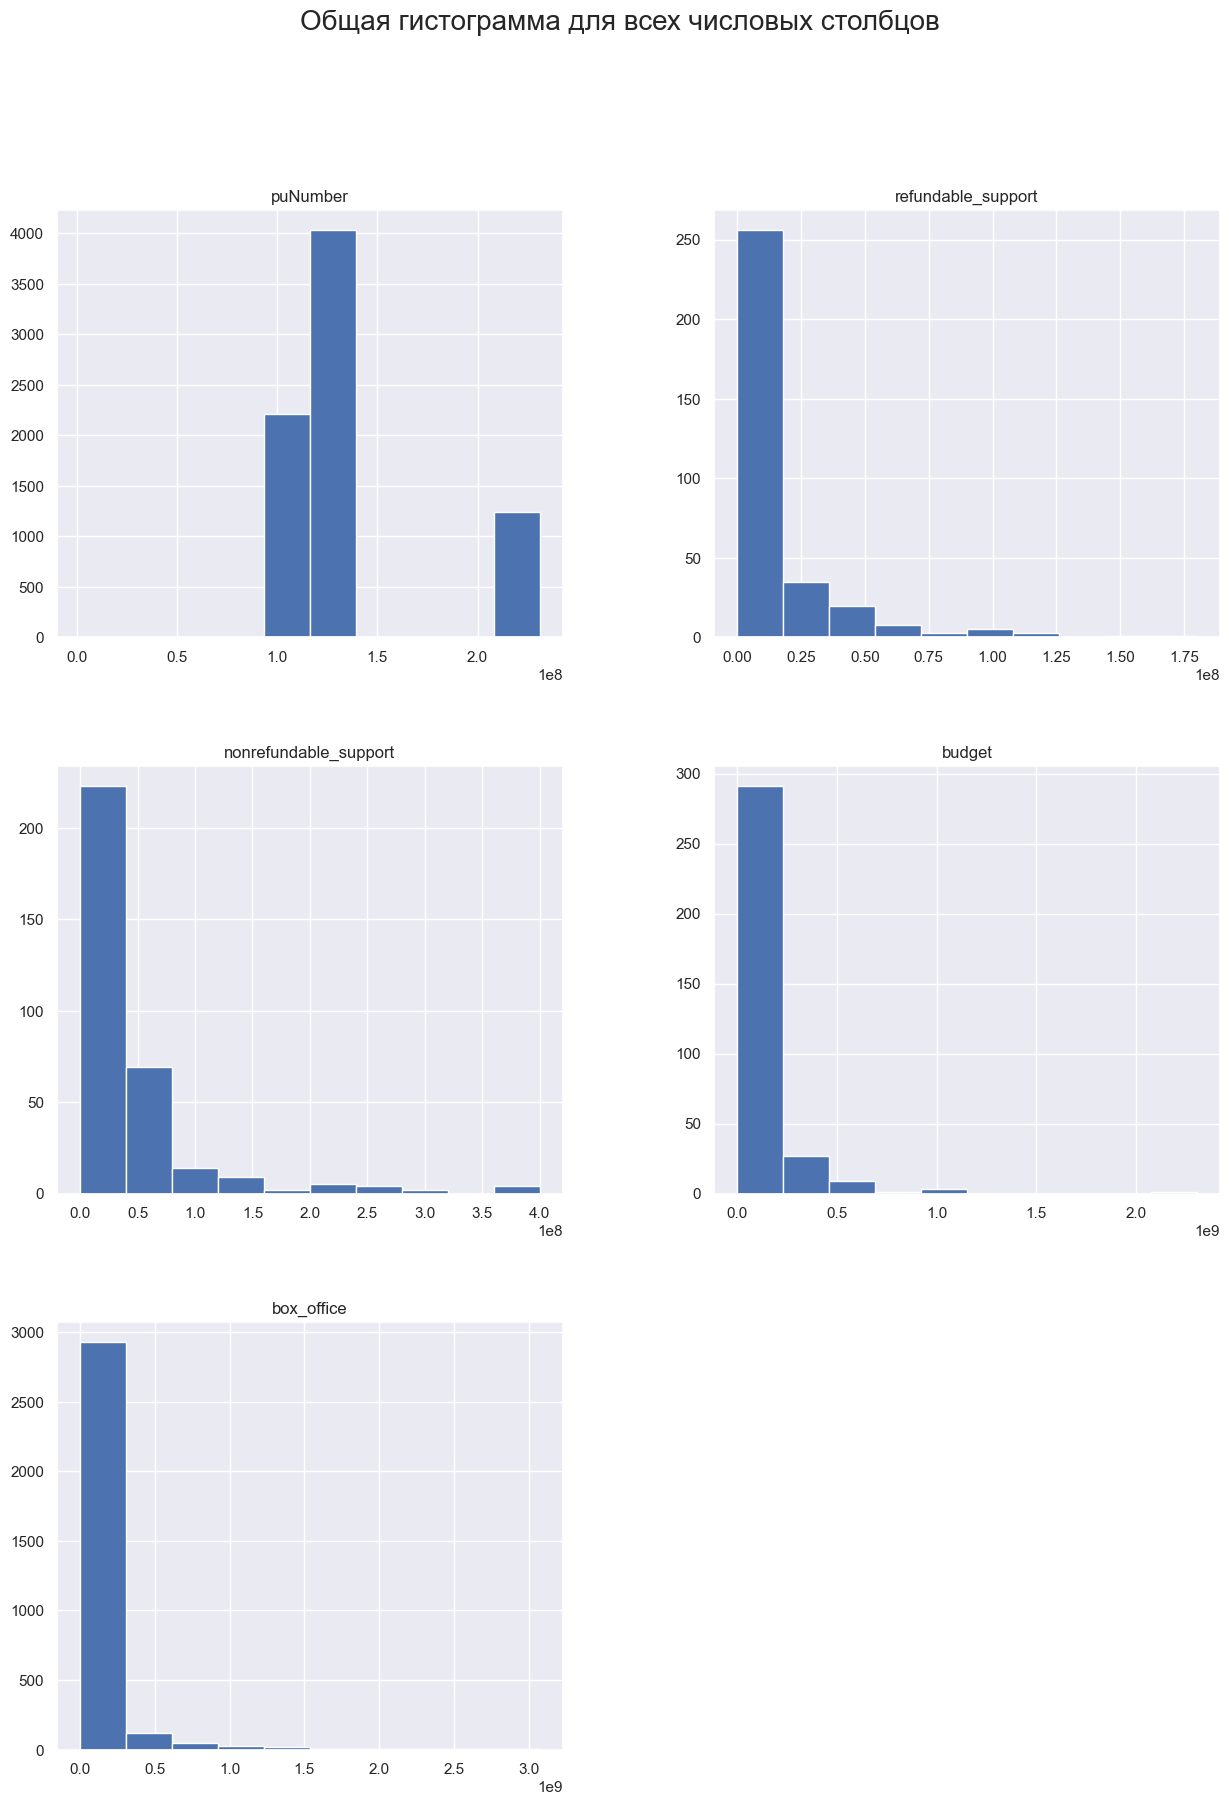

In [10]:
data.hist(figsize=(15, 20))
plt.suptitle('Общая гистограмма для всех числовых столбцов', fontsize=20)
plt.show()

Распределения в данных вполне обычные и не вызывают подозрения

<a class="anchor" id="check_type"></a>
#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Превратим содержимое столбца `show_start_date` в понятные для Python даты. Это поможет применять методы с датой и упрощает понимание

In [12]:
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'], format='%Y-%m-%dT%H:%M:%S'
)

Проверяем

In [13]:
data['show_start_date'].head()

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

___
---

Необходимо будет перевести столбец `ratings` в вещественный тип, но в нем присутствуют проблемы, которые мы исправим чуть позже. Пока запомним про него.

In [14]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

___
---

<a class="anchor" id="study_skip"></a>
#### Шаг 2.2. Изучим пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

Отобразим суммарное количество пропусков в каждом столбце

In [15]:
data.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Начнем с колонки страны-производителя

In [16]:
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...","111,001,216.00",2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


С Ералашем и Мультом все просто: пропуска всего два и мы знаем страны-производителей. Заполним значения в соответствие с подкатегориями, которые имеются в данной колонке

In [17]:
data.loc[data['title'] == 'Детский юмористический киножурнал "Ералаш. Ну просто фантазтика!"', 'production_country'] = 'СССР, Россия'
data.loc[data['title'] == 'Мульт личности. Выпуск 5', 'production_country'] = 'Россия'

Проверяем

In [18]:
(data
    .loc[(data['title'] == 'Детский юмористический киножурнал "Ералаш. Ну просто фантазтика!"') 
         | (data['title'] == 'Мульт личности. Выпуск 5')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...","111,001,216.00",2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""","СССР, Россия","Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


___
---

Есть записи, где пропущены колонки с студией, режиссером, продюссером

In [19]:
data.query('title == "Мульт личности. Выпуск 5"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Колонки с студиями, режиссерами, продюссерами, жанрами мы заполнить не сможем, потому что эти данные пришлось бы искать вручную и вносить. Сопоставить эти строки с другими данными (к примеру с студиями и годом) и найти зависимость не представляется возможным, т.к. уникальных таких данных очень мало и зависимость у них может быть не линейная. 

Пропуски в колонках с господдержкой присутствуют в фильмах, которые не получали государственную поддержку.

Пропуски в колонке рейтинга говорят о том, что на момент сбора информации этих фильмов не было на кинопоиске, либо у них нет ни одной оценки.

Пропуски в колонке, где содержится информация о сборах в рублях, говорят о том, что данные фильмы не показывали в Российских кинотеатрах.

Заменим пропущенные значения в колонках `director`, `producer`, `genres` на значение `unknown`

In [20]:
data.loc[data['director'].isna(), 'director'] = 'unknown'
data.loc[data['producer'].isna(), 'producer'] = 'unknown'
data.loc[data['genres'].isna(), 'genres'] = 'unknown'

Проверим

In [21]:
data.query('title == "Жди меня"')[['title', 'director', 'producer', 'genres']]

,title,director,producer,genres
150,Жди меня,"А.Столпер, Б.Иванов",unknown,unknown


<a class="anchor" id="study_duplicates"></a>
#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишим причины, которые могли повлиять на появление дублей.

Поищем явные дубликаты

In [22]:
data.duplicated().sum()

0

Поищем дубликаты в столбцах

Найдем совпадения по прокатному удостоверению

In [23]:
#data[data.duplicated(subset=['puNumber'])]
data[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


В общем два номера прокатных удостоверений совпали с двумя разными фильмами (два по два, в сумме 4). Так что по названию фильма И удостоверению дубликатов нет. По прокатным удостоверениям мы анализ проводить не будем, поэтому оставим эти две пары дубликатов. 

Причины этих дубликатов не совсем понятны. С одной стороны названия "Анализируй это" и "Анализируй то" очень похожи и работник, который вносил данные в таблицу мог как-то ошибиться. С другой стороны у других двух дублей названия разные, но у каждой пары дубликатов точно одинаковая дата и ошибка могла быть техническая, но таких совпадений по таблице очень много и повторений в номерах больше нет. 

Посмотрим дубликаты по колонке с названиями

In [24]:
data['box_bool'] = ~data['box_office'].isna() # Добавим столбец, который указывает на то, выходил фильм в прокат или нет. 
                                               # Данный шаг перенесся из раздела №3 :)
bubu = data.groupby('title').agg({'box_bool':['count', 'sum']})
bubu.columns = ['count', 'sum']
#bubu.query('(count > 1)')
print(1-len(bubu)/len(data))

0.09537803900614483


Масштабы бедствия довольно велики: 573 итоговые строки, 10% от всех записей. Просто удалить мы их не можем, слишком много полезных данных потеряется, потому что дубликаты не явные, в нескольких копиях разбросана разная информация. И вручную выборочно исправить такое мы тоже не сможем, оставляя полную и нужную информацию. Поэтому примем решение оставить данные как есть и будем воспринимать дубликаты как разные фильмы.

На этом этапе дубликаты возникли из-за того, что по одному фильму выдавали несколько разных номеров прокатных удостоверений и в некоторых записях данные дополнялись и изменялись, поэтому технически это разнные записи, все версии которых остаются в реестре, чтобы не возникало путаницы.

<a class="anchor" id="study_category"></a>
#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

Думаю самое время упомянуть, что в столбце `title` часто встречаются лишнее нижнее подчеркивание в начале/конце названия, например 'Аватар_'

In [25]:
data[data['title'] == 'Аватар_'].index

Int64Index([3893, 3924, 3989], dtype='int64')

 Аватаров_ целых 3 штуки. И таких значений очень много.Удалим лишние андерскоры в колонке

In [26]:
data['title'] = data['title'].str.replace('_', '')

Проверим

In [27]:
data[data['title'] == 'Аватар_'].index

Int64Index([], dtype='int64')

In [28]:
data[data['title'] == 'Аватар'].index

Int64Index([3893, 3924, 3989], dtype='int64')

___
---

Изучим теперь столбец с типом фильма

In [29]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Невооруженым взглядом замечаем с краев записей лишние пробелы. Данная проблема присутствует и в столбце с студиями. Проблема глобальная. Удалим лишние пробелы в всех категориальных столбцах, даже в тех, где их не смогли визуально найти

In [30]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Проверяем

In [31]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

___
---

Проверим колонку с возрастными ограничениями

In [32]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

С ней все в порядке

<a class="anchor" id="cheсk_values"></a>
#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные и решим, как с такими данными лучше поступить.

Раз столбец `budget` уже включает в себя полный объём государственной поддержки, он должен быть больше или равен сумме возвратных и невозвратных средств. Проверим это условие

In [33]:
#data[~data['budget'].isna()]
data.query('budget < refundable_support + nonrefundable_support')\
    [['title', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'show_start_date']]

,title,refundable_support,nonrefundable_support,budget,financing_source,show_start_date
2053,14+,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",2014-12-19 12:00:00+00:00
2058,Дуxless 2,0.00,"75,000,000.00",0.00,Фонд кино,2015-01-26 12:00:00+00:00
2472,Воин (2015),"10,000,000.00","70,000,000.00",0.00,Фонд кино,2015-09-28 12:00:00+00:00
2532,Бармен.,"20,000,000.00",0.00,0.00,Фонд кино,2015-05-26 12:00:00+00:00
2615,Савва. Сердце воина,"60,000,000.00","100,000,000.00",0.00,Фонд кино,2015-07-21 12:00:00+00:00
2684,Тряпичный союз,0.00,"59,000,000.00",0.00,Фонд кино,2015-06-08 12:00:00+00:00
2788,Срочно выйду замуж,0.00,"35,000,000.00",0.00,Фонд кино,2015-09-30 12:00:00+00:00
2874,Помню - не помню!,0.00,"6,000,000.00",0.00,Министерство культуры,2016-03-01 12:00:00+00:00
3047,Любовь с ограничениями,"19,000,000.00","51,000,000.00",0.00,Фонд кино,2016-04-29 12:00:00+00:00
3565,Притяжение (2016),0.00,"250,000,000.00",0.00,Фонд кино,2016-12-16 12:00:00+00:00


Наши опасения подтвердились: в таблице 17 проблемных записей за 2014 - 2019 года (5% от всех фильмов (332), которым оказывалась господдержка), в которых нулевое начение общей господдержки, хотя возвратные и невозвратные средства не нулевые. К тому же в этих строках указан источник государственного финансирования: это "Фонд кино" и "Министерства культуры". Видимо произошел сбой, и значения в столбце `budget` потерялись. Нам для дальнейшего анализа потребуются восстановим эти значения: через пару шагов, когда добавим столбец с долей господдержки, мы выявим, какую часть от общего бюджета в среднем выплачивали "Фонд кино" и "Министерство культуры" за данный период.

___
---

Проверим столбец с рейтингом

In [34]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Имеются определенные проблемы: часть рейтингов записана долями, а часть - процентами. На КиноПоиске рейтинг считается по 10 бальной шкале. Конвертируем значения в доли

In [35]:
# удалим знак %
data['ratings'] = data['ratings'].str.replace('%', '')

In [36]:
# переведем тип данных в вещественный
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce').astype('Float64')

In [37]:
# поделим выбивающиеся значения на 10
data.loc[(data['ratings'] < 1) | (data['ratings'] > 10), 'ratings'] /= 10

Снова выведем список рейтингов

In [38]:
data['ratings'].unique()

<FloatingArray>
[ 7.2,  6.6,  6.8,  7.7,  8.3,  8.0,  7.8,  8.1,  7.1,  6.0,  7.4,  5.8,  8.7,
  6.3,  6.9,  5.0,  4.3,  7.3,  7.0,  6.4, <NA>,  8.2,  7.5,  6.7,  7.9,  5.9,
  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,  8.5,  8.8,  5.5,  5.1,  5.7,  5.4,
  9.9,  4.4,  4.5,  5.3,  4.1,  8.4,  2.6,  3.8,  4.6,  4.8,  4.0,  3.0,  1.6,
  4.2,  5.2,  4.7,  4.9,  3.9,  2.7,  3.3,  2.9,  2.8,  3.7,  1.4,  3.1,  9.7,
  3.5,  3.2,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6,  9.1,  9.4,  9.0,  1.9,
  1.0,  8.9,  1.3,  1.8,  1.2,  1.7,  9.8]
Length: 85, dtype: Float64

<a class="anchor" id="add_columns"></a>
#### Шаг 2.6. Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

Добавим столбец года

In [39]:
data['year'] = pd.DatetimeIndex(data["show_start_date"]).year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Для удобствва будем ориентироваться на запись с Ералашем, где несколько режиссеров и жанров

In [40]:
data.loc[3185, ['title', 'director', 'genres', 'production_country']].to_frame()

,3185
title,Сборник короткометражных фильмов о любви - 3
director,"У.Грайнер, Д.Гротелл, Г.Мендеш, М.Ситер, А.Хал..."
genres,"мультфильм,фантастика,фэнтези"
production_country,США - Франция - Канада - Германия - Австралия ...


Создадим функции, которые выведут первые значения из списка режиссёров жанров и стран

In [41]:
def split_column(value):
    try:
        return value.split(',')[0].strip()
    except:
        return value

In [42]:
def split_column_country(value):
    try:
        return value.split('-')[0].strip()
    except:
        return value

Добавим с помощью нее новые столбцы

In [43]:
data['first_director'] = data['director'].apply(split_column)
data['basic_genre'] = data['genres'].apply(split_column)
data['first_production_country'] = data['production_country'].apply(split_column_country)

И проверим

In [44]:
data.loc[3185, ['title', 'director', 'genres', 'production_country', 'first_director', 'basic_genre', 'first_production_country']].to_frame()

,3185
title,Сборник короткометражных фильмов о любви - 3
director,"У.Грайнер, Д.Гротелл, Г.Мендеш, М.Ситер, А.Хал..."
genres,"мультфильм,фантастика,фэнтези"
production_country,США - Франция - Канада - Германия - Австралия ...
first_director,У.Грайнер
basic_genre,мультфильм
first_production_country,США


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Теперь добавим столбец с долями гос.поддержки

In [45]:
data['share'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).round(2)

Мы помним, что недавно выявили пропущенные значения общего бюджета для 17 фильмов. Это 5% от всех фильмов (332), которым оказывалась господдержка. Чтобы коректно посчитать среднее для них, заменим их пока на пропуски

In [46]:
data['share'] = data['share'].replace(np.inf, np.nan)

Проверяем наличие пропуска

In [47]:
data.loc[2471, ['title', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'share']].to_frame()

,2471
title,Pro любовь
refundable_support,0.00
nonrefundable_support,"20,000,000.00"
budget,"55,195,000.00"
financing_source,Министерство культуры
share,0.36


Проверяем столбец с долями

In [48]:
data.query('~budget.isna()')[['title', 'director', 'genres', 'share']].head()

,title,director,genres,share
1281,Пока еще жива,А.Атанесян,"драма,мелодрама",0.33
1448,Бесславные придурки,А.Якимчук,unknown,0.70
1498,Невидимки,"Р.Давлетьяров, С.Комаров","комедия,фантастика",0.61
1524,БЕРЦЫ,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,М.Угаров,драма,0.62


___
---

Теперь заполним пропуски. Посмотрим на распределение величин в колонке с долями господдержки для "Фонд кино" и "Министерства культуры" за период 2014 - 2019 г.

In [49]:
data.query('((financing_source == "Фонд кино") | (financing_source == "Министерство культуры")\
    & (year > 2013) & (year < 2020)) ')['share']\
    .describe()

count   293.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.65
max       0.70
Name: share, dtype: float64

В среднем данные источники гос.финансирования оказывали поддержку, равную 59% от общего бюджета. Заполним имеющиеся пропуски в бюджете на основании этих данных

In [50]:
data.loc[data['budget'] < (data['refundable_support'] + data['nonrefundable_support']), 'budget'] =\
    (data['refundable_support'] + data['nonrefundable_support']) * 1.59

Проверяем

In [51]:
data.loc[2471, ['title', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].to_frame()

,2471
title,Pro любовь
refundable_support,0.00
nonrefundable_support,"20,000,000.00"
budget,"55,195,000.00"
financing_source,Министерство культуры


<a class="anchor" id="short_conclusion"></a>
**Промежуточный вывод**

1. Преобразовали содержимое столбца show_start_date в понятные для Python даты. Это помогло применять методы с датой и упрощает понимание.
2. Заполнили пропуски в колонке с странами-производителями.
3. Выявили пропуски в колонках с студиями, режиссерами, продюссерами, жанрами. Их мы не стали заполнять, потому что эти данные пришлось бы искать вручную и вносить, что затратит много ресурсов.
4. На основе пропусков выявили фильмы, которые получили гос.поддержку и которые не показывали в Российских кинотеатрах.
5. Проверили и обработали на явные и неявные дубликаты столбцы, выявили проблемы, возникшие в столбцах с названиями и номерами прокатных удостоверений фильмов (подробно описано в общем выводе).
6. Устранили проблему, которая встречается почти во всех категориальных столбцах: устранили лишние символы и пробелы.
7. Обнаружили проблемные записи в бюджетом, изучили их и подготвили для дальнейшей обработки.
8. Исправили неверные значения в столбце с рейтингом, а также изменили тип столбца на целочисленный.
9. Для дальнейшей обработки добавили столбцы: 
 - с информацией о годе проката;
 - с именем и фамилией главного режиссёра и основным жанром фильма;
 - долями от общего бюджета фильма, которые составляет государственная поддержка.

<a class="anchor" id="eda"></a>
### Шаг 3. Проведем исследовательский анализ данных

- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Добавим столбец, который указывает на то, выходил фильм в прокат или нет

In [52]:
data['box_bool'] = ~data['box_office'].isna()

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах

In [53]:
# доля, которая составляет фильмы с указанной информацией о прокате в кинотеатрах 
((~data['box_office'].isna()).sum() / len(data['box_office'])).round(2)
data['box_bool'].mean().round(2)

0.42

Мы имеем 42% фильмов с указанной информацией о прокате.

Сделаем сводную таблицу в которой определим, сколько фильмов выходило в прокат каждый год и как доля фильмов с указанной информацией о прокате в кинотеатрах менялась по годам. 

In [54]:
# создадим сводную и гистограмму с ежегодным количеством прокатов
pivot_box = (data
    .pivot_table(index='year', values='box_bool', aggfunc=['sum', 'mean'])
    .round(2)
)
pivot_box.columns=['sum', 'ratio']
pivot_box

,sum,ratio
year,,
2010,105,0.11
2011,109,0.18
2012,128,0.22
2013,184,0.29
2014,279,0.35
2015,465,0.66
2016,526,0.64
2017,357,0.71
2018,475,0.53


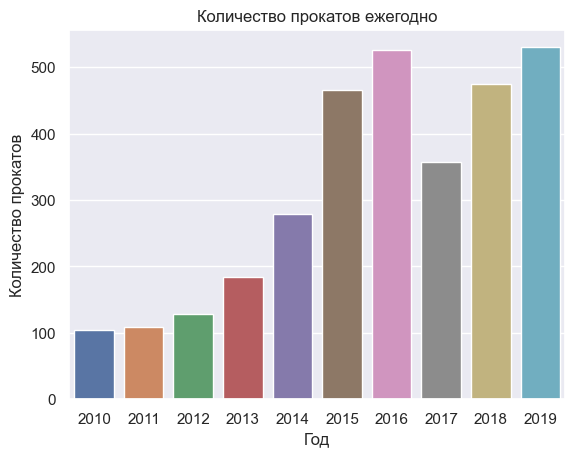

In [55]:
sns.barplot(x=pivot_box.index, y='sum', data=pivot_box).set_title('Количество прокатов ежегодно')
plt.xlabel('Год')
plt.ylabel('Количество прокатов');

Создадим график с долями, которые составляют фильмы с указанной информацией о прокате в кинотеатрах к общему количеству фильмов

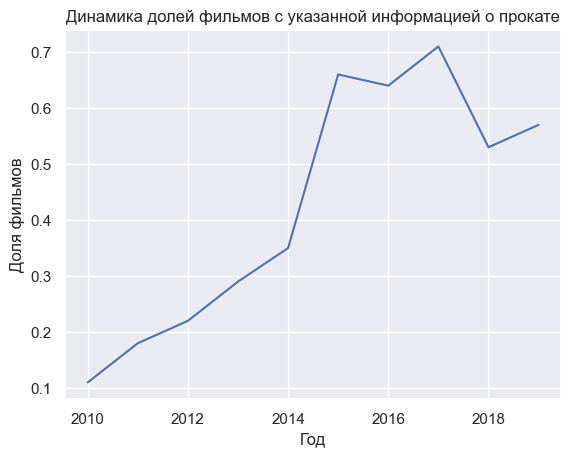

In [56]:
pivot_box['ratio'].plot().set_title('Динамика долей фильмов с указанной информацией о прокате')
plt.xlabel('Год')
plt.ylabel('Доля фильмов');

Мы видим, как за 10 лет количество фильмов, выходящих в прокат, увеличилось более чем в 5 раз, ровно как и доля фильмов с указанной информацией о прокате. Первое может объяснить увеличение общего количества кинокартин.

Полнее всего представлена информация за 2017 год - 71% 

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [57]:
# создадим датасет с фильмами, содержащими данные о прокате
data_box_office = data[~data['box_office'].isna()]

# сводная по сборам
data_box_office_sum = data_box_office.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
data_box_office_sum

,box_office
year,
2010,"2,428,654.00"
2011,"14,102,765.00"
2012,"6,955,423.00"
2013,"29,799,706.20"
2014,"7,444,951,859.20"
2015,"39,497,365,196.40"
2016,"47,866,299,741.91"
2017,"48,563,707,217.51"
2018,"49,668,403,134.32"


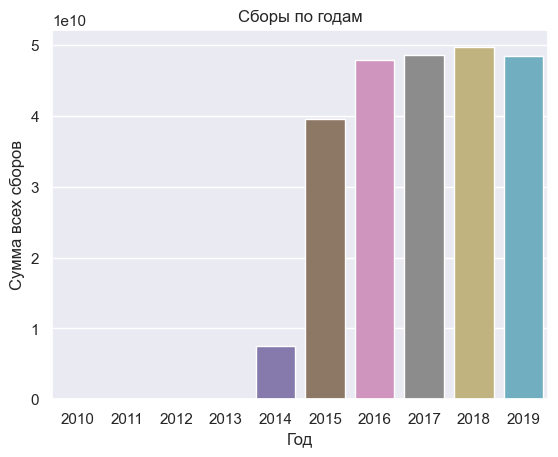

In [58]:
sns.barplot(x=data_box_office_sum.index, y='box_office', data=data_box_office_sum).set_title('Сборы по годам')
plt.xlabel('Год')
plt.ylabel('Сумма всех сборов');

In [59]:
year_min_data_box = (data_box_office_sum[data_box_office_sum['box_office'] == 
                                         data_box_office_sum['box_office'].min()].index).to_list()
min_data_box = (data_box_office_sum.loc[data_box_office_sum['box_office'] == 
                                       data_box_office_sum['box_office'].min()]['box_office']
                                       .to_list())

year_min_data_box = ''.join(str(v) for v in year_min_data_box)
min_data_box = ''.join(str(v) for v in min_data_box)

In [60]:
print(f'В {year_min_data_box} году была минимальная общая сумма сборов равная {min_data_box} руб.')

В 2010 году была минимальная общая сумма сборов равная 2428654.0 руб.


In [61]:
year_max_data_box = (data_box_office_sum[data_box_office_sum['box_office'] == 
                        data_box_office_sum['box_office'].max()].index.to_list())
max_data_box = (data_box_office_sum.loc[data_box_office_sum['box_office'] == 
                                        data_box_office_sum['box_office'].max()]['box_office']
                                        .to_list())

year_max_data_box = ''.join(str(v) for v in year_max_data_box)
max_data_box = ''.join(str(v) for v in max_data_box)

In [62]:
print(f'В {year_max_data_box} году была максимальная общая сумма сборов равная {max_data_box} руб.')

В 2018 году была максимальная общая сумма сборов равная 49668403134.31999 руб.


С 2010 по 2019 сумма сборов сформировала границы с 2.4 млн.руб. до 49.7 млн.руб соответственно. Такой рост может объясняться повышением цен на билеты, ростом сетей кинотеатров, увеличением доли прокатных кинокартин.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [63]:
# сводная по средним сборам
pivot_mean_box = (
    data_box_office.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
    )
pivot_mean_box.columns=['mean', 'median']
pivot_mean_box

,mean,median
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


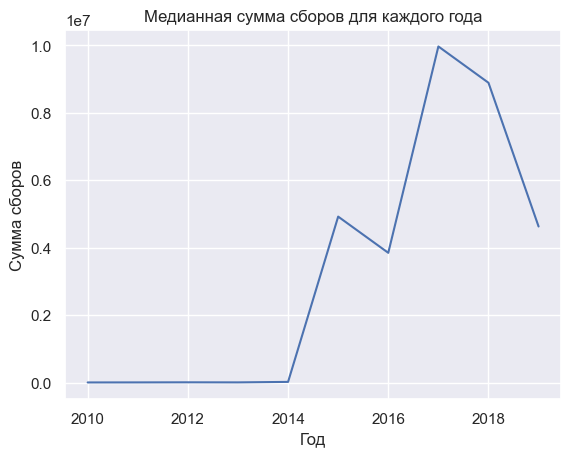

In [64]:
pivot_mean_box['median'].plot().set_title('Медианная сумма сборов для каждого года')
plt.xlabel('Год')
plt.ylabel('Сумма сборов');

Довольно большая разница между средней и медианой. Возможно в бОльшую сторону среднее утягивают кинопремьеры, которые отличаются высокими сборами.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

In [65]:
pivot_age_box = data_box_office.query('(year > 2014) & (year < 2020)')\
                    .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')\
                    .sort_values('box_office', ascending=False)
pivot_age_box

,box_office
age_restriction,
«16+» - для детей старше 16 лет,"76,034,733,643.63"
«12+» - для детей старше 12 лет,"60,619,446,628.33"
«6+» - для детей старше 6 лет,"55,798,610,799.68"
«18+» - запрещено для детей,"40,759,615,572.12"
«0+» - для любой зрительской аудитории,"809,077,425.97"


In [66]:
max_pivot_age_box = pivot_age_box['box_office'].max()
#index_max_pivot_age_box = (pivot_age_box['box_office'].max()).index.to_list()
#index_max_pivot_age_box = ''.join(str(v) for v in index_max_pivot_age_box)

print(f'Фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате, равное {max_pivot_age_box} руб.')

Фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате, равное 76034733643.62994 руб.


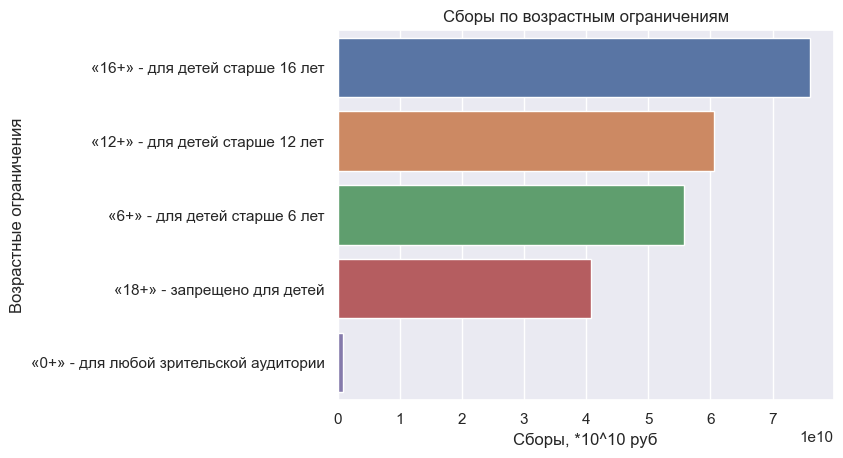

In [67]:
(sns.barplot(y=pivot_age_box.index, x='box_office', data=pivot_age_box)
    .set_title('Сборы по возрастным ограничениям'))
plt.xlabel('Сборы, *10^10 руб')
plt.ylabel('Возрастные ограничения');

Фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате. Вероятно это можно связать с тем, что такие фильмы уже не детские, и они интересны как подросткам, так и взрослым, что увеличивает общую аудиторию. 

Взглянем на картину сборов по годам

In [68]:
pivot_age_box_all = data_box_office.query('(year > 2014) & (year < 2020)')\
    .pivot_table(index='age_restriction', columns='year', values='box_office', aggfunc='sum')
pivot_age_box_all

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"379,054,578.37","150,228,848.67","229,598,930.00","32,449,002.11","17,746,066.82"
«12+» - для детей старше 12 лет,"13,616,082,008.91","12,204,446,524.39","7,851,427,660.67","14,267,291,660.69","12,680,198,773.67"
«16+» - для детей старше 16 лет,"11,368,120,870.27","16,664,548,541.74","18,745,042,900.06","16,503,602,346.96","12,753,418,984.60"
«18+» - запрещено для детей,"5,432,308,367.44","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64"
«6+» - для детей старше 6 лет,"8,701,799,371.41","12,053,146,008.24","12,086,142,145.76","10,104,974,623.41","12,852,548,650.86"


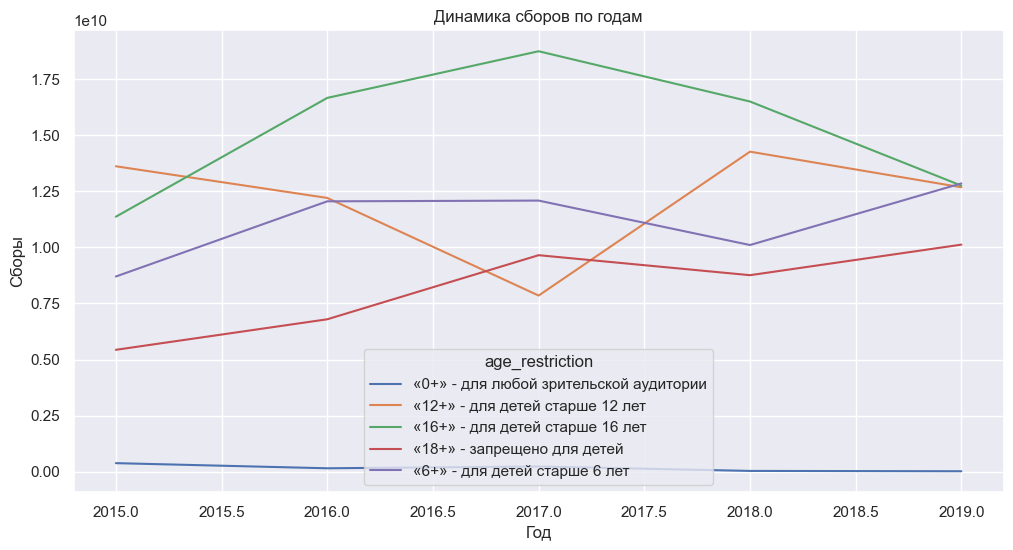

In [69]:
pivot_age_box_all.T.plot(figsize=(12, 6)).set_title('Динамика сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы');

Каждая возрастная группа держит свою позицию относительно других возрастных групп на протяжении всех пяти лет, хотя 6+, 12+ и 16+ в 2019 году неожиданно принесли одинаково по сборам. Из всего времени выбивается только гуппа "12+" в 2017 году. Возможно дело связано с количеством фильмов с данным возрастным ограничением в этом году

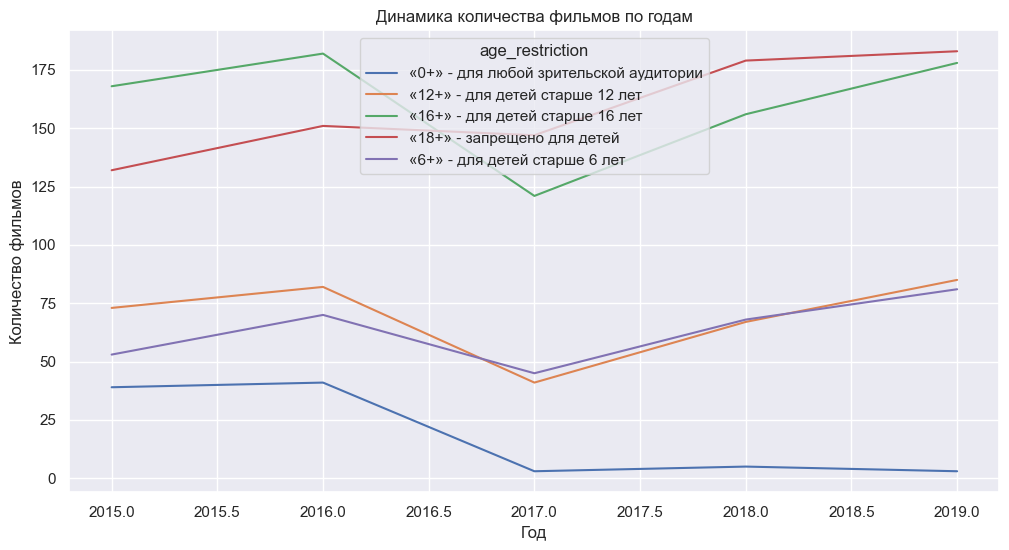

In [70]:
data_box_office.query('(year > 2014) & (year < 2020)')\
    .pivot_table(index='age_restriction', columns='year', values='title', aggfunc='count')\
    .T.plot(figsize=(12, 6)).set_title('Динамика количества фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов');

Действительно, в 2017 по количеству  "просели" все возрастные ограничения, но на количество сборов это отразилось только на группе "12+". Возможно совпало так, что в этом году были более интересные фильмы в других возрастных категориях и как взрослые, так и подростки, посещали больше их. 

Посчитаем доли крайних годов

In [71]:
# доля 0+ за 2015
(pivot_age_box_all.loc['«0+» - для любой зрительской аудитории', 2019] / pivot_age_box_all[2019].sum()).round(2)

0.0

In [72]:
# доля 0+ за 2019
(pivot_age_box_all.loc['«0+» - для любой зрительской аудитории', 2015] / pivot_age_box_all[2015].sum()).round(2)

0.01

In [73]:
# доля 16+ за 2015
(pivot_age_box_all.loc['«16+» - для детей старше 16 лет', 2019] / pivot_age_box_all[2019].sum()).round(2)

0.26

In [74]:
# доля 16+ за 2019
(pivot_age_box_all.loc['«16+» - для детей старше 16 лет', 2015] / pivot_age_box_all[2015].sum()).round(2)

0.29

Возастная группа "16+" - самая многочисленная по сборам (26-29%). Это связано, в первую очередь, с долей населения, принадлежащих разным группам. Так, в России, доля населения в возрасте 0-16 лет составляет чуть более 18%. Т.е. около 82% населения потенциально ходят на фильмы с возрастным огранчением "16+", плюс на эти фильмы ходят подростки и дети младшего возраста, т.к. в кинотеатрах редко проверяют возраст посетителей.

Самая малочисленная группа - 0+ (0-1%). Это можно объяснить тем, что настолько детские фильмы/мультфильмы подросткам и взрослым не интересны, а малышей могут приводить только родители, что происходит очень редко, т.к. многие считают это пустой тратой денег, потому что ребенок ничего не запомнит, а билет за взрослого все равно придется покупать.

<a class="anchor" id="study_support_film"></a>
### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Взглянем на выборку данных

In [75]:
data_budget = data\
    .query('~budget.isna()')

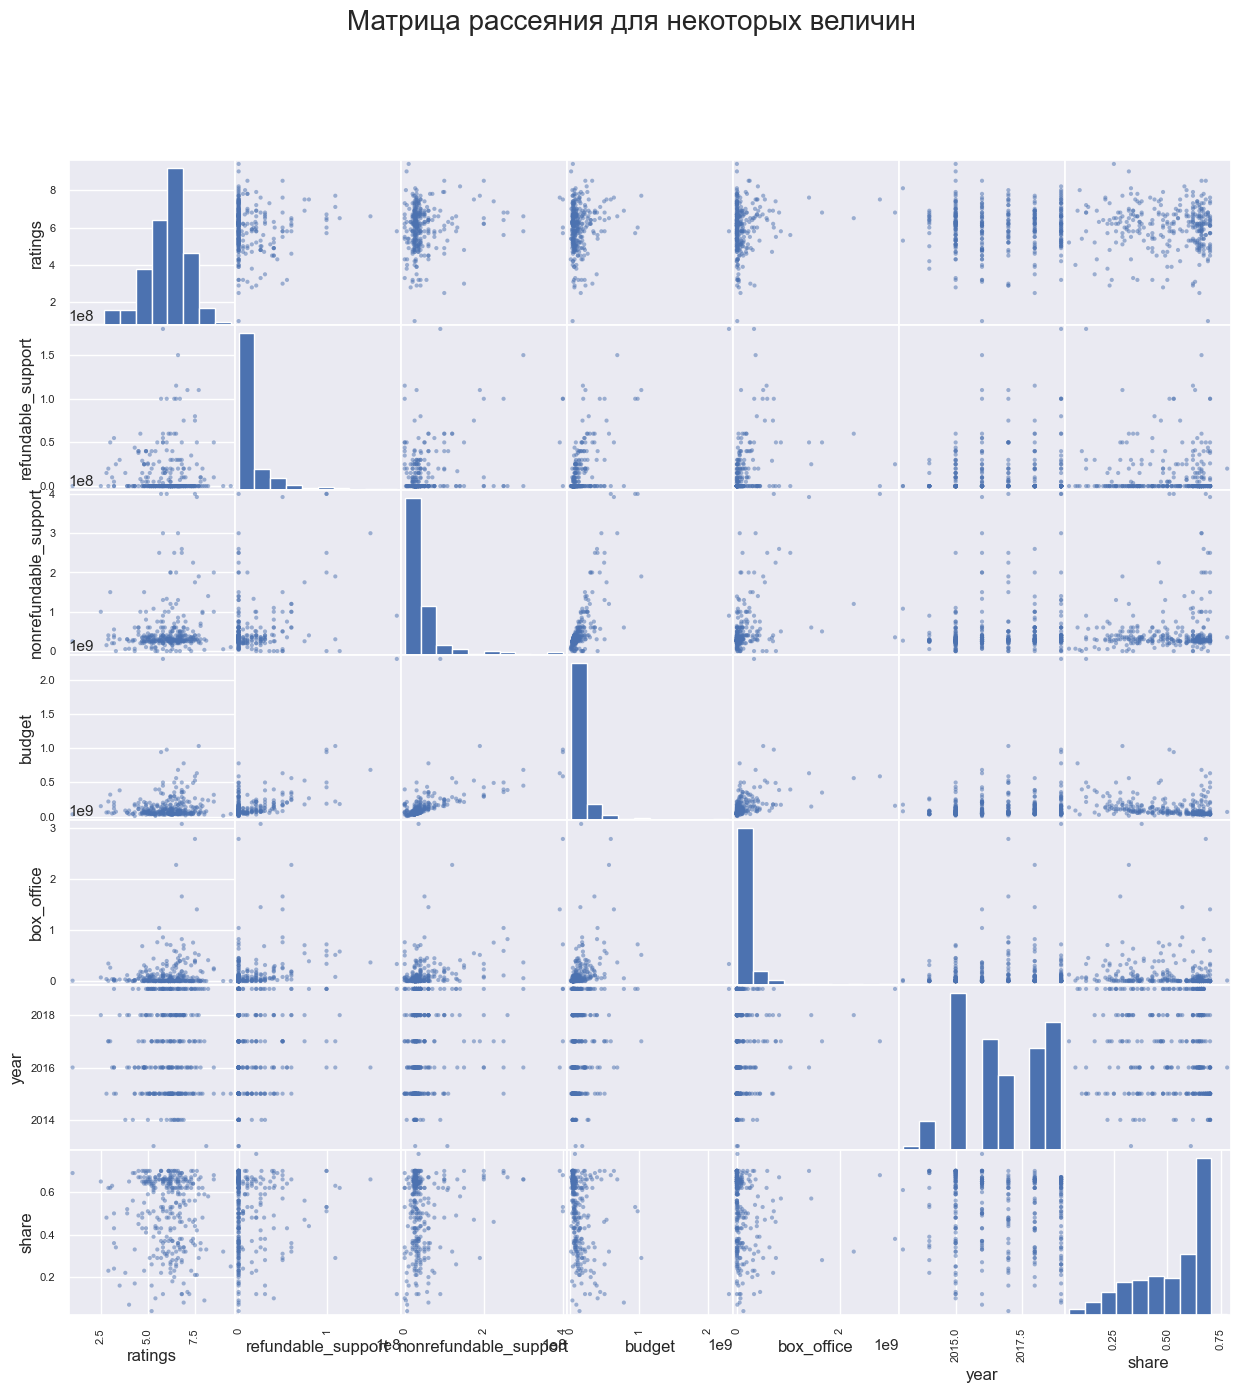

In [76]:
(pd
    .plotting
    .scatter_matrix(
        data_budget[['ratings', 'age_restriction', 'refundable_support', 'nonrefundable_support',\
                     'budget', 'box_office', 'year', 'share']], figsize=(15, 15))
)
plt.suptitle('Матрица рассеяния для некоторых величин', fontsize=20);

Добавим столбец, в котором будет сумма господдержки(возвратная + невозвратная)

In [77]:
data_budget['all_support'] = data_budget['refundable_support'] + data_budget['nonrefundable_support']

Определим сколько выделяется средств на поддержку кино ежегодно

In [78]:
pivot_all_support = (
    data_budget
    .pivot_table(index='year', values='all_support', aggfunc=['sum', 'count', 'median'])
)
pivot_all_support.columns = ['sum', 'count', 'median']
pivot_all_support

,sum,count,median
year,,,
2013,"134,347,945.00",2,"67,173,972.50"
2014,"572,002,299.00",16,"27,500,000.00"
2015,"3,656,241,459.00",86,"30,000,000.00"
2016,"4,303,155,482.00",61,"35,000,000.00"
2017,"3,183,971,662.00",41,"40,000,000.00"
2018,"3,446,969,465.00",56,"45,000,000.00"
2019,"4,904,000,000.00",70,"40,000,000.00"


Визуализируем цифры

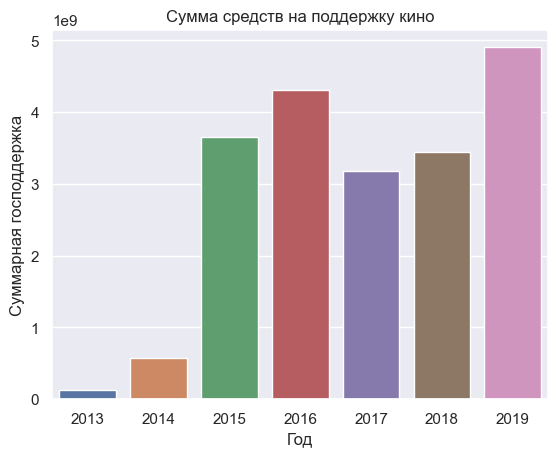

In [79]:
sns.barplot(x=pivot_all_support.index, y='sum', data=pivot_all_support).set_title('Сумма средств на поддержку кино')
plt.xlabel('Год')
plt.ylabel('Суммарная господдержка');

In [80]:
pivot_all_support.query('year > 2014')['sum'].mean()

3898867613.6

Первое замечание: записи о государственной поддержке фильмов начинается с 2013 года и составляло примерно 134 млн.руб./год на 2 фильма, а итенсивное фиансирование началось в 2015 году и составляло 3.7 млрд.руб./год на 86 фильмов (если верить предоставленной информации). Максимальное значение годового финансирования пришлось на 2019 год - 4.9 млрд.руб. (70 фильмов). В среднем за последние 5 лет ежегодно выделяется от государства 3.9 млрд.руб.

In [81]:
len(data_budget['title'].unique())

332

с 2013 по 2019 года было профинансировано более 330 фильмов.

In [82]:
data_budget.query('(nonrefundable_support > 0) & (refundable_support == 0)')['nonrefundable_support'].count()

221

Из них на полностью безвозвратной основе более 220 фильмов

In [83]:
data_budget[data_budget['all_support'] == data_budget['all_support'].max()][['title', 'all_support']]

,title,all_support
7464,Союз спасения,"500,000,000.00"
7474,Вторжение,"500,000,000.00"


Наибольшую сумму получили фильмы "Союз спасения" и "Вторжение". Оба - по 500 млн.руб.

In [84]:
(data_budget[data_budget['nonrefundable_support'] == 
             data_budget['nonrefundable_support'].max()][['title', 'nonrefundable_support']])

,title,nonrefundable_support
5653,Движение вверх,"400,000,000.00"
7464,Союз спасения,"400,000,000.00"
7474,Вторжение,"400,000,000.00"


А наибольшую невозвратную сумму получили 3 фильма: "Движение вверх", "Союз спаения" и "Притяжение". Все получил по 400 млн.руб.

Проверим окупаемость таких фильмов: вычтем из сборов бюджет фильма (в который уже входят возвратный и невозвратные средства от государства. 

*P.s. Мы здесь не будем углубляться в тонкости кинорынка, учитывать что невозвратные средства остаются у продюссеров, около половины сборов могут забрать кинотеатры, а многие считают фильм окупившимся, если выручка в 2 раза выше бюджета.

In [85]:
# избавимся от данных с пропусками, т.к. мы не сможем работать с ними
data_budget = data_budget.query('~(box_office.isna())')

In [86]:
data_budget['pay_back'] = data_budget['box_office'] - data_budget['budget']
data_budget['pay_back'] = data_budget['pay_back']
data_budget['box_office'] = data_budget['box_office']

In [87]:
(data_budget[(data_budget['title'] == 'Движение вверх') 
            | (data_budget['title'] == 'Союз спасения') 
            | (data_budget['title'] == 'Вторжение')]
            [['title', 'budget', 'refundable_support', 'nonrefundable_support', 'box_office','pay_back']])

,title,budget,refundable_support,nonrefundable_support,box_office,pay_back
5653,Движение вверх,"590,192,191.00",0.00,"400,000,000.00","2,779,686,144.00","2,189,493,953.00"
7464,Союз спасения,"980,000,000.00","100,000,000.00","400,000,000.00","717,703,185.53","-262,296,814.47"


Фильм "Союз спасения" не окупился и остался в минусе на 260 млн.руб. А вот "Движение вверх" собрал 2.78 млд.руб., с лихвой окупился и вернул долг согударству. 

Складывается впечатление, что окупаемость фильма не прямолинейно зависит от количества денежных ресурсов, хотя кажтся, что должно быть наоборот. Проверим зависимость окупаемости от бюджета финансируемых фильмов.

In [88]:
# создадим столбец, который будет говорить о факте окупаемости фильма
data_budget['pay_back_bool'] = data_budget['pay_back'] > 0

In [89]:
len(data_budget['budget'])

318

Потеряли всего 14 значений, 4%. Итак, найдем долю окупаемости всех фильмов

In [90]:
data_budget['pay_back_bool'].mean().round(2)

0.23

Всего 23% инвестируемых государством фильмов выходят в плюс. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


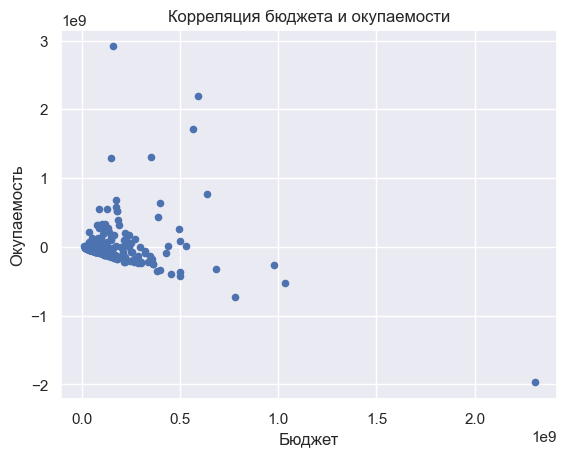

In [91]:
data_budget.plot(x='budget', y='pay_back', kind='scatter').set_title('Корреляция бюджета и окупаемости')
plt.xlabel('Бюджет')
plt.ylabel('Окупаемость');

При этом отсутствует прямая зависимость бюджета от окупаемости: есть фильмы с большим бюджетом и провальной окупаемостью, а есть наоборот - с скромным бюджетом и выходящие в хороший плюс.

**Проследим успешность кинокартин от режиссеров**

In [92]:
pivot_pay_back_director = (
    data_budget
    .pivot_table(index='first_director', values=['pay_back_bool', 'ratings'], 
                 aggfunc={'pay_back_bool': ['count', 'sum', 'mean'], 'ratings':'median', }))

pivot_pay_back_director.columns=['count', 'mean', 'sum', 'ratings']

pivot_pay_back_director['mean'] = pivot_pay_back_director['mean'].round(2)

pivot_pay_back_director = pivot_pay_back_director.sort_values(['count', 'mean'], ascending=False)

pivot_pay_back_director.head(15)

,count,mean,sum,ratings
first_director,,,,
Р.Давлетьяров,5,0.20,1,6.30
Д.Дьяченко,4,1.00,4,5.45
С.Андреасян,4,0.25,1,6.75
Д.Шмидт,3,0.67,2,6.20
К.Шипенко,3,0.67,2,6.80
С.Мокрицкий,3,0.67,2,7.40
А.Аксененко,3,0.33,1,5.60
А.Цицилин,3,0.33,1,6.40
Н.Хомерики,3,0.33,1,5.80


Мы видим режиссеров, у которых окупились все их фильмы, например у Д.Дьяченко 4 из 4 фильмов окупились, хотя средний рейтинг всего 5.5. А, например, у режиссера Р.Давлетьярова всего 1 из 5 фильмов выстрелил, зато средний рейтинг 6.3. У.Котта ни один из 3х фильмов не окупились, средний рейтинг 6.2. Создается впечатление, что окупаемость зависит от режиссера: чем выше процент окупаемости фильмов у опроделенного режиссера, тем вероятней его следующий фильм окупится, и наоборот. Но фильмов по каждому режиссеру слишком мало, чтобы была репрезентативная выборка, по которой можно бы было сделать однозначные выводы. 

**Проверим корреляцию рейтинга с бюджетом и финансированием**

In [93]:
data_ratings_budget = data_budget.query('~ratings.isna()')
data_no_budget = data.query('budget.isna()')

In [94]:
data_ratings_budget['ratings'].astype('int').corr(data_ratings_budget['budget']).round(2)

0.06

In [95]:
data_ratings_budget['ratings'].astype('int').corr(data_ratings_budget['all_support']).round(2)

0.1

Покажем средние для рейтинга общую господдердку и бюджет

In [96]:
pivot_data_ratings = (
    data_ratings_budget
    .pivot_table(index='ratings', values=['budget', 'all_support'], aggfunc='median'))
pivot_data_ratings

,all_support,budget
ratings,,
1.00,"25,000,000.00","36,016,269.00"
2.50,"100,000,000.00","154,245,687.00"
2.80,"30,000,000.00","62,044,646.00"
2.90,"45,061,957.50","143,756,920.50"
3.00,"200,000,000.00","323,232,109.00"
3.10,"30,000,000.00","47,328,000.00"
3.20,"50,000,000.00","142,611,454.00"
3.30,"25,000,000.00","73,379,554.00"
3.50,"60,000,000.00","385,000,000.00"


Тяжело воспринимаются такое количество записей. Категоризируем оценки на 5 равных интервалов

In [97]:
pivot_data_ratings['budget'] = pivot_data_ratings['budget']
pivot_data_ratings['ratings_2'] = pd.cut(pivot_data_ratings.index,[0,1.9,3.9,5.9,7.9,10])
pivot_data_ratings

,all_support,budget,ratings_2
ratings,,,
1.00,"25,000,000.00","36,016,269.00","(0.0, 1.9]"
2.50,"100,000,000.00","154,245,687.00","(1.9, 3.9]"
2.80,"30,000,000.00","62,044,646.00","(1.9, 3.9]"
2.90,"45,061,957.50","143,756,920.50","(1.9, 3.9]"
3.00,"200,000,000.00","323,232,109.00","(1.9, 3.9]"
3.10,"30,000,000.00","47,328,000.00","(1.9, 3.9]"
3.20,"50,000,000.00","142,611,454.00","(1.9, 3.9]"
3.30,"25,000,000.00","73,379,554.00","(1.9, 3.9]"
3.50,"60,000,000.00","385,000,000.00","(1.9, 3.9]"


Выведем сводную с группировкой по категориям

In [98]:
pivot_data_ratings_2 = (
    pivot_data_ratings
    .pivot_table(index='ratings_2', values=['budget', 'all_support'], aggfunc='median'))

pivot_data_ratings_2

,all_support,budget
ratings_2,,
"(0.0, 1.9]","25,000,000.00","36,016,269.00"
"(1.9, 3.9]","37,530,978.75","116,365,727.00"
"(3.9, 5.9]","36,750,000.00","76,711,173.50"
"(5.9, 7.9]","40,894,763.75","90,631,034.25"
"(7.9, 10.0]","31,923,440.50","71,290,950.00"


И визуализируем

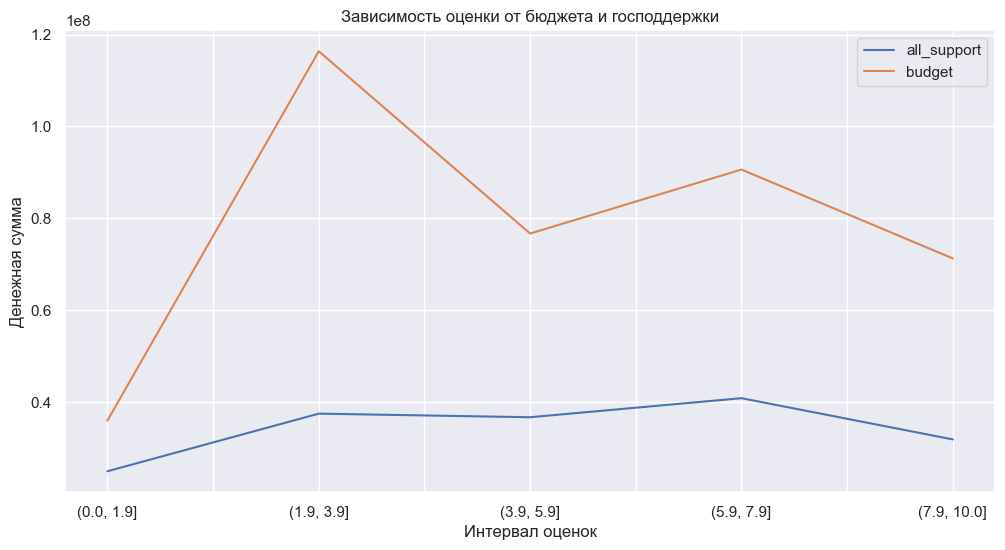

In [99]:
# хотел повернуть график, но с интервалами не получилось, пришлось бы создавать новый столбец
    # и принять его за индексы, что немного затратно. Если воспринимается тяжело, переделаю))
pivot_data_ratings_2.plot(figsize=(12, 6)).set_title('Зависимость оценки от бюджета и господдержки')
plt.xlabel('Интервал оценок')
plt.ylabel('Денежная сумма');

При очень маленьком бюджете продукт по итогу получает низкий рейтинг. Это очевидно: при малом бюджете можно задействовать только мало ресурсов, в итоге в фильме снимаются малоизвестные актеры, присутствуют низкое качество монтажа и спецэфектов, дешевая рекламная компания и др. Соответственно, если у фильма очень маленький бюджет, то господдержка не может значительно помочь кинокартине получить хорошую оценку. 

При среднем бюджете и выше все не нак однозначно: при большом бюджете оценка может колебаться от 2 до 4, а при среднем - достигать почти 10. Видимо, зависимость нелинейная и большую роль играют режиссер, идея, реклама. При приблизительно одном и том же бюджете оценки могут колебаться от 2 до 8. Поэтому предугадать успешность кинокартины по одному только бюджету не удастся, здесь роль играют другие более сильные факторы.

**Определим эффективность господдержки**

Создадим датасет c российский фильмы без господдержки. Датасет с господдержкой у нас уже есть - `data_budget`. Оставим только записи без пропусков в нужных нам столбцах

In [100]:
with_support = data_budget.copy()
with_support = with_support.query('(~ratings.isna()) & (year > 2014)')
without_support = data.query('(first_production_country == "Россия") & (budget.isna()) & (~ratings.isna()) & (~box_office.isna()) & (year > 2014)')

Добавим столбец с фактом наличия господдержки

In [101]:
with_support['budget_bool'] = ~with_support['budget'].isna()

In [102]:
without_support['budget_bool'] = ~without_support['budget'].isna()

Оставим в датасетах только нужные столбцы, чтобы они легко воспринимались на вид

In [103]:
with_support = with_support[['title', 'puNumber',
       'ratings', 'box_office', 'year', 'budget_bool']]

In [104]:
without_support = without_support[['title', 'puNumber',
       'ratings', 'box_office', 'year', 'budget_bool']]

In [105]:
with_support.head()

,title,puNumber,ratings,box_office,year,budget_bool
1854,Тайна Сухаревой башни. Чародей равновесия,"114,000,115.00",6.10,"15,078,858.60",2015,True
1870,А зори здесь тихие...,"111,002,915.00",8.50,"249,166,767.70",2015,True
1903,Призрак.,"111,001,815.00",7.00,"352,804,320.40",2015,True
1912,Ведьма .,"111,002,215.00",7.40,"51,907.50",2015,True
2058,Дуxless 2,"111,000,415.00",6.60,"446,163,511.00",2015,True


In [106]:
without_support.tail()

,title,puNumber,ratings,box_office,year,budget_bool
7338,До Нового года осталось...,"111,018,819.00",6.20,"434,992.50",2019,False
7371,Ржев,"111,019,219.00",6.60,"86,340,133.01",2019,False
7388,Полицейский с Рублевки. Новогодний Беспредел 2,"111,019,519.00",5.80,"1,039,706,431.83",2019,False
7398,Решала. Нулевые,"111,019,719.00",6.70,"16,696,944.62",2019,False
7463,Небо измеряется милями,"111,021,919.00",6.50,"367,224.00",2019,False


Соединим таблицы, чтобы сделать красивую наглядную диаграмму

In [107]:
join_support = with_support.merge(without_support, how='outer')
join_support.head()

,title,puNumber,ratings,box_office,year,budget_bool
0,Тайна Сухаревой башни. Чародей равновесия,"114,000,115.00",6.10,"15,078,858.60",2015,True
1,А зори здесь тихие...,"111,002,915.00",8.50,"249,166,767.70",2015,True
2,Призрак.,"111,001,815.00",7.00,"352,804,320.40",2015,True
3,Ведьма .,"111,002,215.00",7.40,"51,907.50",2015,True
4,Дуxless 2,"111,000,415.00",6.60,"446,163,511.00",2015,True


In [108]:
join_support['budget_bool'].mean().round(2)

0.62

Из имеющихся отфильтрованных данных получилось, что господдержка оказана 62% от всех российский фильмов

Сравним фильмы с гос.поддержкой и без нее по сборам

In [109]:
pivot_box_join_support = (
    join_support
    .pivot_table(index='year', values='box_office', columns='budget_bool', aggfunc='median'))
pivot_box_join_support.head()

budget_bool,False,True
year,,
2015,"3,353,333.60","9,589,318.50"
2016,"869,148.00","20,861,320.67"
2017,"12,153,771.50","55,108,014.76"
2018,"4,743,315.00","30,325,879.15"
2019,"2,923,602.50","30,287,238.83"


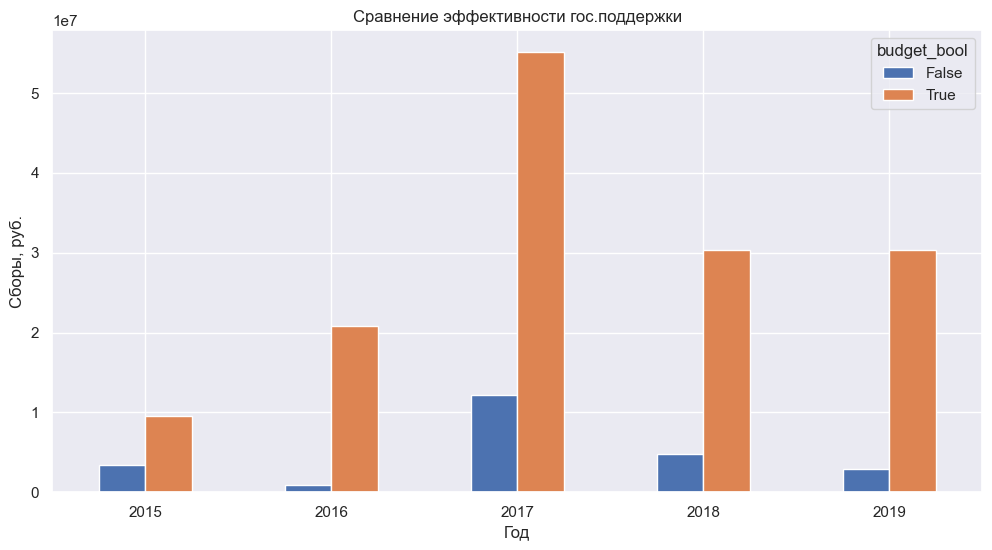

In [110]:
pivot_box_join_support.plot(kind='bar', figsize=(12, 6)).set_title('Сравнение эффективности гос.поддержки')
plt.xlabel('Год')
plt.xticks(rotation=0)
plt.ylabel('Сборы, руб.');

Видим явное преобладание средних сборов у фильмов с гос.поддержкой над фильмами без нее. Вероятно денежная помощь позволяет задействовать больше ресурсов для рекламы, т.к. нужно много денег на прокат и выпуск, вдобавок всегда имеются конкуренты, и за заголовок "Премьера" в кинотеатрах тоже нужно платить.

Найдем во сколько раз, в среднем, сборы у профинансированных фильмов выше других

In [111]:
pivot_box_join_support.columns = ['False', 'True']
pivot_box_join_support['share'] = pivot_box_join_support['True'] / pivot_box_join_support['False']
pivot_box_join_support['share'].median().round(1)

6.4

В 6.4 раза выше выручка у кинокартин с господдержкой

И теперь сравним фильмы с гос.поддержкой и без нее по рейтингу

In [112]:
pivot_ratings_join_support = (
    join_support
    .pivot_table(index='year', values='ratings', columns='budget_bool', aggfunc='median'))
pivot_ratings_join_support.head()

budget_bool,False,True
year,,
2015,5.20,6.20
2016,6.00,5.80
2017,5.60,6.20
2018,6.10,6.20
2019,6.10,6.20


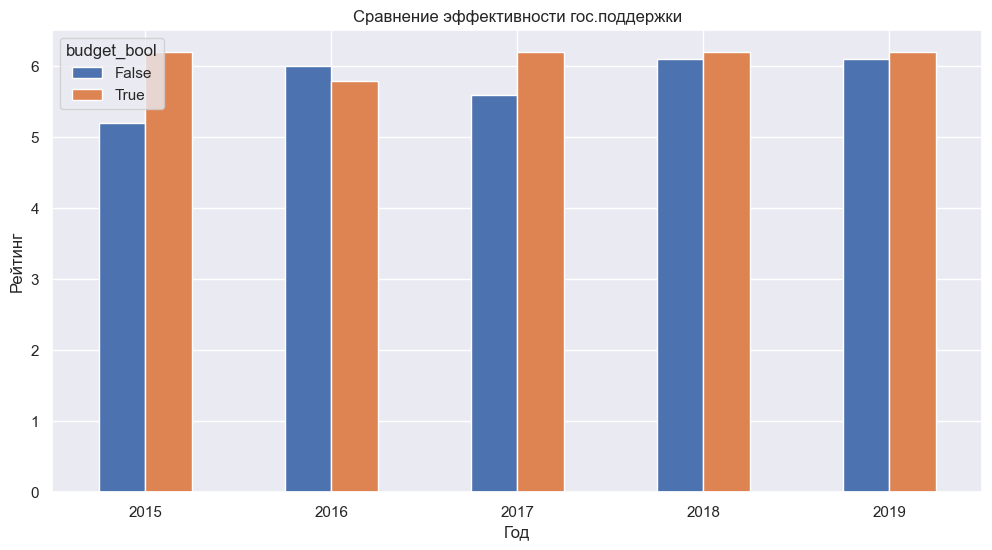

In [113]:
pivot_ratings_join_support.plot(kind='bar', figsize=(12, 6)).set_title('Сравнение эффективности гос.поддержки')
plt.xlabel('Год')
plt.xticks(rotation=0)
plt.ylabel('Рейтинг');

А вот рейтинг не отличается больше, чем на один балл, но фильмы с господдержкой почти всегда преобладают над другими. 

Если сборы - удел, в основном, кинотеатров, то рейтинг - более широкая метрика. Поставить оценку фильму на кинопоиске можно из дома, тратя меньше денег на просмотр фильма, чем в кино. Предположу что отсюда и интересная картина, где разница в сборах огромная, а в рейтинге минимальная. Немаловажную роль играют приглашенные кинозвезды, спецэффекты, монтаж, делая картинку привлекательней, но также очень важна идея и продуманный сценарий фильма, которые возможно отразить в кинокартине без огромных затрат. Мы уже ранее видели, как фильмы некоторых режиссеров не окупались, но получили довольно высокий рейтинг. Все-таки в среднем рейтинг у фильмов, которым была оказана поддержка, выше, чем у других. Людям нравится видеть более дорогую картинку.

**Пробежимся мельком по нескольким столбцам, просто для интереса**

In [114]:
display('Количество профинансированных типов фильма')
display(data_budget['type']
      .value_counts()
      .to_frame())
print()

display('Доля профинансированных типов фильма')
display((data_budget['type']
    .value_counts() / len(data_budget['type']))
    .round(2)
    .to_frame())
print()

display('Доля НЕпрофинансированных типов фильма')
display((data_no_budget['type']
    .value_counts() / len(data_no_budget['type']))
    .round(2)
    .to_frame())

'Количество профинансированных типов фильма'

,type
Художественный,288
Анимационный,30


'Доля профинансированных типов фильма'

,type
Художественный,0.91
Анимационный,0.09


'Доля НЕпрофинансированных типов фильма'

,type
Художественный,0.78
Анимационный,0.11
Прочие,0.06
Документальный,0.04
Научно-популярный,0.01
Музыкально-развлекательный,0.00


При финансировании нет акцента на определенные типы фильмов: у профинансированных фильмов доли типов фильмов примерно такие же, как у нефинансированных

In [115]:
data_budget.groupby('production_country').agg({'puNumber' : 'count'}).sort_values('puNumber')

,puNumber
production_country,
"Россия, Армения",1
"Россия, Германия, Великобритания",1
"Россия, Германия, Казахстан, Польша, Китай",1
"Россия, Латвия, Чешская Республика",1
"Россия, Сербия",1
"Россия, Украина, Польша",1
"Россия, Франция, Латвия",1
Россия-Китай,1
Россия-Словакия-Чехия,1


Государство финансирует не только российские фильмы, но также совместные с другими странами.

In [116]:
data_budget\
    .pivot_table(index='basic_genre', values=['puNumber', 'ratings'], aggfunc={'puNumber':'count', 'ratings':'median'})\
    .sort_values(by='puNumber', ascending=False)

,puNumber,ratings
basic_genre,,
драма,87,6.50
комедия,73,5.80
мультфильм,30,6.15
unknown,15,<NA>
триллер,15,5.60
мелодрама,14,6.25
фэнтези,11,6.80
ужасы,10,5.10
фантастика,10,6.40


Больше всего среди финансируемых фильмов преобладают жанры: драма и комедия. Самые редкие фильмы: реальное ТВ, биография, детские, криминал, спорт.

<a class="anchor" id="conclusion"></a>
### Шаг 5. Общий вывод

**Замечания к сервису:**

- В колонке с номером прокатного удостоверения необходимо запретить ввод всех типов даннык, кроме целочисленного, чтобы в нее не попадал текст и не затруднял дальнейшую обработку.
- Необходимо обеспечить заполнение колонки с рейтингом одним типом данных однородного вида, желательно десятичной дробью вещественого типа с диапазоном от 1 до 10.
- Для полноценного аналица колонки с студиями, режиссерами, продюссерами, жанрами, страной-изготовителем должны быть заполнены, т.к. это уникальные данные, которые нельзя восстановить.
- Нужно исключить возможность добавлять в таблицу одинаковые номера прокатных удостоверений, т.к. это уникальные данные для каждого фильма. 
- Также предлагаю добавить возможность обновлять информацию о фильмах, создавая новый номер прокатного удостоверения, а старую запись отправлять в архивный csv-файл. Это избавит от потери данных в свежих записях, исключит дубликаты, а также позволит отслеживать актуальные данные. Соответственно колонку с датой премьеры можно оставить с первой версии записи.
- Обязательно разобраться с лишними символами (андерскорами) и пробелами в категориальных данных. Проблема, судя по всему, технического характера. 
- Также к технической проблеме относиться наличие нулей в столбце бюджета фильма. Если нет информации по данных фильмам, необходимо оставлять ячейки пустыми.
- Ячейки с жанром желательно заполнять с пробелами между названиями. Это не критично, но лишнее действие при обработке добавляет.

**Выводы по исследованию**

- В данных лишь 42% записей составляют фильмы с указанной информацией о прокате в кинотеатрах. Полнее всего представлена информация за 2017 год - 71%.
- За 10 лет количество фильмов, выходящих в прокат, увеличилось более чем в 5 раз.
- В 2010 году была минимальная общая сумма сборов равная 2 428 654 руб. В 2018 году была максимальная общая сумма сборов равная 49 668 403 134 руб. С 2010 по 2019 годовая сумма сборов выросла с 2.4 млн.руб. до 49.7 млн.руб. 
- Возастная группа "16+" - самая многочисленная по сборам (26-29%). Самая малочисленная группа - 0+ (0-1%).
- Итенсивное фиансирование государством началось в 2015 году. С тех пор ежегодно государством выделяется в среднем 3.9 млрд.руб. на поддержку кино. с 2013 по 2019 года было профинансировано более 330 фильмов. Из них на полностью безвозвратной основе более 220 фильмов. Наибольшую сумму получили фильмы "Союз спасения" и "Вторжение". Оба - по 500 млн.руб. А наибольшую невозвратную сумму получили 3 фильма: "Движение вверх", "Союз спаения" и "Притяжение". Все получил по 400 млн.руб.
- Всего 23% инвестируемых государством фильмов окупаются.
- Существуют успешные режиссеры, которые не раз добивались того, что их кинокартины окупались. По другую сторону есть те, у кого фильмы ни разу не смогли окупиться. И у тех, и у других могут быть хорошие рейтинги и бюджеты, но нет от них прямой зависимости. На их месте большую роль играют другие факторы, как например режиссер, идея, реклама. Но практически всегда кинокартина не окупается при очень маленьком бюджете (ниже 400 млн.руб.).
- В имеющихся данных видно явное преобладание средних сборов у фильмов с гос.поддержкой над фильмами без нее: разница в среднем составляет 640%. Дополнительные финансы позволяют задействовать больше рессурсов для продвижения и заработка на прокате.
- В среднем рейтинг профинансированных фильмов выше, чем у тех, кому не была оказана поддержка, но разница не более 1 балла из 10.

[К содержанию](#contents)